In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
plt.style.use('ggplot')
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
import yfinance as yf

%matplotlib inline

plt.style.use('fivethirtyeight')

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [2]:
trx= yf.Ticker('TRX-USD')

In [5]:
trx.info

{'companyOfficers': [],
 'twitter': '"https://twitter.com/justinsuntron"',
 'name': 'TRON',
 'startDate': 1505260800,
 'description': 'TRON (TRX) is a cryptocurrency . TRON has a current supply of 98,195,011,909.11476 with 98,195,013,797.12347 in circulation. The last known price of TRON is 0.0755166 USD and is down -2.65 over the last 24 hours. It is currently trading on 600 active market(s) with $2,153,982,514.56 traded over the last 24 hours. More information can be found at https://tron.network/.',
 'maxAge': 1,
 'exchange': 'CCC',
 'shortName': 'TRON USD',
 'exchangeTimezoneName': 'UTC',
 'exchangeTimezoneShortName': 'UTC',
 'isEsgPopulated': False,
 'gmtOffSetMilliseconds': '0',
 'quoteType': 'CRYPTOCURRENCY',
 'symbol': 'TRX-USD',
 'messageBoardId': 'finmb_TRX_CCC',
 'market': 'ccc_market',
 'previousClose': 0.076824225,
 'regularMarketOpen': 0.076824225,
 'twoHundredDayAverage': 0.07576448,
 'trailingAnnualDividendYield': None,
 'payoutRatio': None,
 'volume24Hr': 2337032192,
 

In [6]:
history = trx.history(period = 'Max')
df = pd.DataFrame(history)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09,0.002304,0.002438,0.002285,0.002344,2924350,0,0
2017-11-10,0.002335,0.002350,0.001989,0.002013,2193620,0,0
2017-11-11,0.002026,0.002298,0.001890,0.002003,1748460,0,0
2017-11-12,0.002006,0.002006,0.001684,0.001783,2174370,0,0
2017-11-13,0.001795,0.002146,0.001771,0.002112,2889150,0,0


In [7]:
X = df.index
y = df['Close']

In [8]:
def df_plot(data, x,y, title = '', xlabel = 'Date', ylabel = 'Value', dpi = 100):
    plt.figure(figsize = (16,5), dpi = dpi)
    plt.plot(x,y, color = 'tab:red')
    plt.gca().set(title=title, xlabel = xlabel, ylabel=ylabel)
    plt.show()

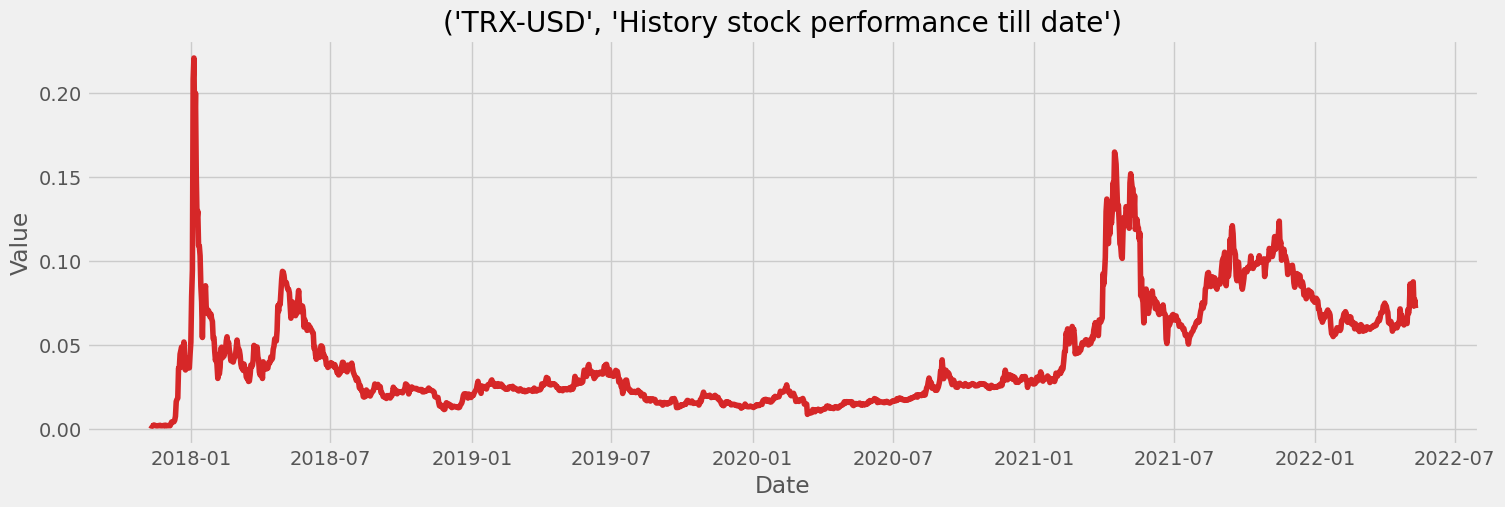

In [9]:
stock_name = 'TRX-USD'
title = (stock_name, 'History stock performance till date')
df_plot(df,X,y, title=title, xlabel = 'Date', ylabel = 'Value', dpi = 100)

In [10]:
df.reset_index(inplace = True)

In [11]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2017-11-09,0.002304,0.002438,0.002285,0.002344,2924350,0,0
1,2017-11-10,0.002335,0.002350,0.001989,0.002013,2193620,0,0
2,2017-11-11,0.002026,0.002298,0.001890,0.002003,1748460,0,0
3,2017-11-12,0.002006,0.002006,0.001684,0.001783,2174370,0,0
4,2017-11-13,0.001795,0.002146,0.001771,0.002112,2889150,0,0


In [21]:
df.drop(['Dividends','Stock Splits'], axis = 1, inplace = True)

In [28]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2017-11-09,0.002304,0.002438,0.002285,0.002344,2924350
1,2017-11-10,0.002335,0.002350,0.001989,0.002013,2193620
2,2017-11-11,0.002026,0.002298,0.001890,0.002003,1748460
3,2017-11-12,0.002006,0.002006,0.001684,0.001783,2174370
4,2017-11-13,0.001795,0.002146,0.001771,0.002112,2889150


In [29]:
df.describe()

,Open,High,Low,Close,Volume
count,1645.000000,1645.000000,1645.000000,1645.000000,1.645000e+03
mean,0.042234,0.044224,0.040185,0.042265,1.066898e+09
std,0.031243,0.033430,0.028979,0.031191,1.180469e+09
min,0.001795,0.002006,0.001684,0.001783,1.748460e+06
25%,0.019677,0.020283,0.019018,0.019677,3.171940e+08
50%,0.028856,0.030023,0.027490,0.028857,8.386029e+08
75%,0.061510,0.063396,0.059651,0.061601,1.368124e+09
max,0.224499,0.300363,0.176712,0.220555,1.397316e+10


In [23]:
df['Date'] = pd.to_datetime(df.Date)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1645 entries, 0 to 1644
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1645 non-null   datetime64[ns]
 1   Open    1645 non-null   float64       
 2   High    1645 non-null   float64       
 3   Low     1645 non-null   float64       
 4   Close   1645 non-null   float64       
 5   Volume  1645 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 77.2 KB


In [25]:
X = df[['Open','High','Low','Volume']]
y = df['Close']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, 
                                                    shuffle = False, random_state=0)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [31]:
regression = LinearRegression()
regression.fit(X_train,y_train)

print('regression coefficient', regression.coef_)
print('regression intercept', regression.intercept_)

regression coefficient [-4.48081176e-01  7.54342772e-01  6.90212843e-01  8.54689646e-15]
regression intercept 8.835583568851668e-05


In [33]:
regression_confidence = regression.score(X_test,y_test)
print('linear regression cofidence: ', regression_confidence)

linear regression cofidence:  0.9922431839308076


In [34]:
predicted = regression.predict(X_test)
print(X_test.head())

          Open      High       Low      Volume
1398  0.103745  0.105824  0.078055  2481055300
1399  0.085329  0.096633  0.083678  3850532893
1400  0.091050  0.094479  0.090413  1691771918
1401  0.093033  0.095774  0.086624  1973955943
1402  0.090829  0.097010  0.090579  2021046580


In [35]:
dfr = pd.DataFrame({'Actual_Price': y_test,'Predicted_Price': predicted})
dfr.head()

,Actual_Price,Predicted_Price
1398,0.085275,0.087326
1399,0.092797,0.092537
1400,0.093024,0.092979
1401,0.090873,0.090454
1402,0.095400,0.095104


In [36]:
dfr.describe()

,Actual_Price,Predicted_Price
count,247.000000,247.000000
mean,0.079703,0.079735
std,0.017552,0.017535
min,0.055043,0.053207
25%,0.063388,0.063370
50%,0.076200,0.076913
75%,0.095518,0.095450
max,0.123602,0.124977


In [38]:
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(y_test, predicted))
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error (RMSE): ', np.sqrt(metrics.mean_squared_error(y_test,
                                                                             predicted)))


Mean Absolute Error (MAE):  0.001124802248945533
Mean Squared Error (MSE):  2.3799847653285766e-06
Root Mean Squared Error (RMSE):  0.0015427199244608778


In [40]:
x2 = dfr.Actual_Price.mean()
y2 = dfr.Predicted_Price.mean()
accuracy1 = x2/y2 * 100

print('The Accuracy of the model is: ', accuracy1)

The Accuracy of the model is:  99.95991376809901


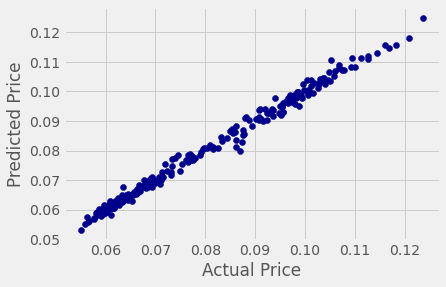

In [41]:
plt.scatter(dfr.Actual_Price, dfr.Predicted_Price, color = 'Darkblue')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.show()

No handles with labels found to put in legend.


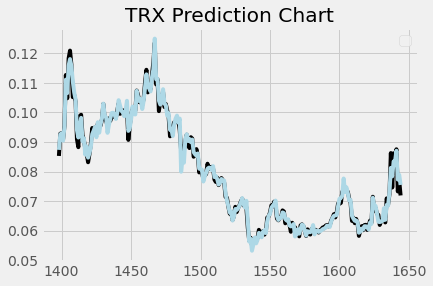

In [42]:
plt.plot(dfr.Actual_Price, color = 'black')
plt.plot(dfr.Predicted_Price, color = 'lightblue')
plt.title('TRX Prediction Chart')
plt.legend()